In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-uofmn-travelers-modeling-competition/submission_sample.csv
/kaggle/input/2021-uofmn-travelers-modeling-competition/train_2021.csv
/kaggle/input/2021-uofmn-travelers-modeling-competition/test_2021.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Explorary Data Analysis

In [3]:
train = pd.read_csv('../input/2021-uofmn-travelers-modeling-competition/train_2021.csv')

In [4]:
train.shape

(17998, 25)

In [5]:
train['fraud'].value_counts()
#We know that the class is heavily skewed, the fraud rate is 15.6% as stated by Travelers.

0    15182
1     2816
Name: fraud, dtype: int64

In [6]:
train.isna().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [7]:
#Dropping data with missing value because there's so little of them
train.dropna(inplace=True)

In [8]:
train.isna().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17836 non-null  int64  
 1   age_of_driver            17836 non-null  int64  
 2   gender                   17836 non-null  object 
 3   marital_status           17836 non-null  float64
 4   safty_rating             17836 non-null  int64  
 5   annual_income            17836 non-null  int64  
 6   high_education_ind       17836 non-null  int64  
 7   address_change_ind       17836 non-null  int64  
 8   living_status            17836 non-null  object 
 9   zip_code                 17836 non-null  int64  
 10  claim_date               17836 non-null  object 
 11  claim_day_of_week        17836 non-null  object 
 12  accident_site            17836 non-null  object 
 13  past_num_of_claims       17836 non-null  int64  
 14  witness_present_ind   

In [10]:
#Make sure the datatype are appropriate
train['witness_present_ind']=train['witness_present_ind'].astype(int)
train['marital_status']=train['marital_status'].astype(int)
train['claim_number']=train['claim_number'].astype(str)
train['fraud']=train['fraud'].astype(str)
train['annual_income']=train['annual_income'].astype(float)
train['zip_code']=train['zip_code'].astype(str)
train['gender'] = train['gender'].astype('category')
train['living_status'] = train['living_status'].astype('category')
train['accident_site'] = train['accident_site'].astype('category')
train['channel'] = train['channel'].astype('category')
train['vehicle_category'] = train['vehicle_category'].astype('category')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   claim_number             17836 non-null  object  
 1   age_of_driver            17836 non-null  int64   
 2   gender                   17836 non-null  category
 3   marital_status           17836 non-null  int64   
 4   safty_rating             17836 non-null  int64   
 5   annual_income            17836 non-null  float64 
 6   high_education_ind       17836 non-null  int64   
 7   address_change_ind       17836 non-null  int64   
 8   living_status            17836 non-null  category
 9   zip_code                 17836 non-null  object  
 10  claim_date               17836 non-null  object  
 11  claim_day_of_week        17836 non-null  object  
 12  accident_site            17836 non-null  category
 13  past_num_of_claims       17836 non-null  int64   
 14  witnes

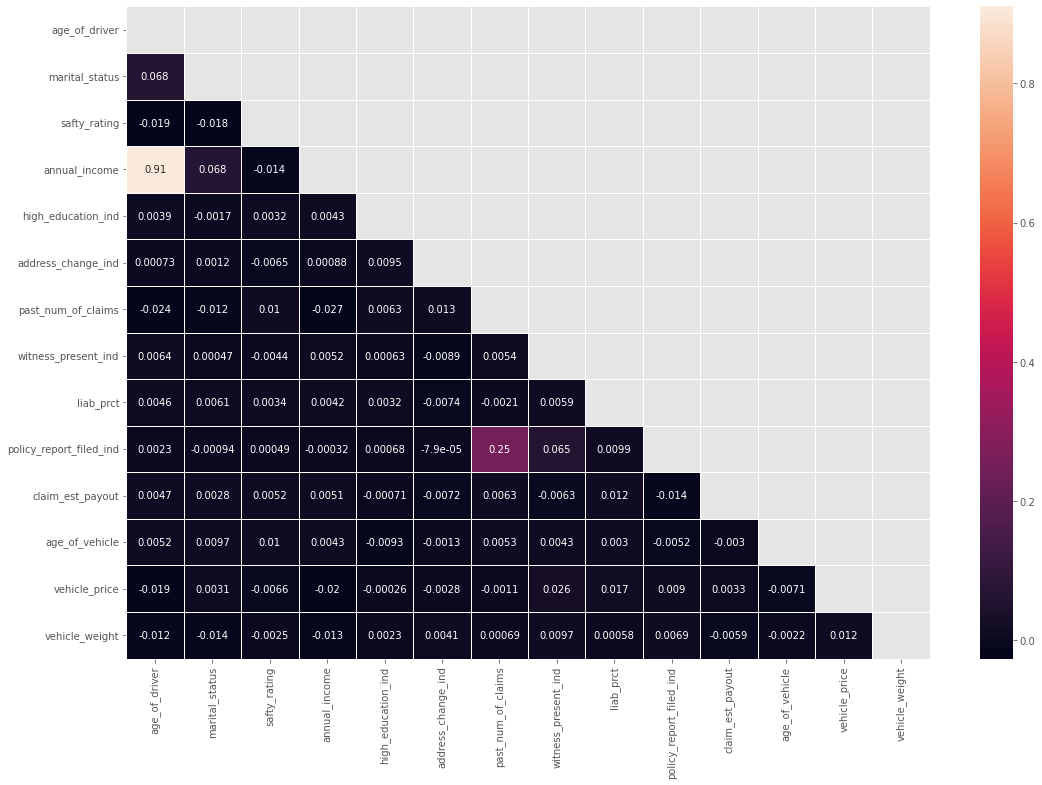

In [12]:
#Check for correlation between variables
plt.figure(figsize = (18, 12))

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()
#We see that age_of_driver are highly correlated with annual_income

In [13]:
#To fit a boxplot for outlier, only consider numerical variable
Z = train.select_dtypes(include = [('int64'),('float64')])

In [14]:
#Coefficient of variation
Z.var()/Z.mean()
#We know that some features have high variances where we will dealt with later by scaling

age_of_driver                 3.272167
marital_status                0.287356
safty_rating                  3.192164
annual_income               232.272012
high_education_ind            0.300757
address_change_ind            0.422932
past_num_of_claims            1.807666
witness_present_ind           0.767536
liab_prct                    22.949825
policy_report_filed_ind       0.399776
claim_est_payout            987.678652
age_of_vehicle                1.018988
vehicle_price              6233.923899
vehicle_weight             6312.152579
dtype: float64

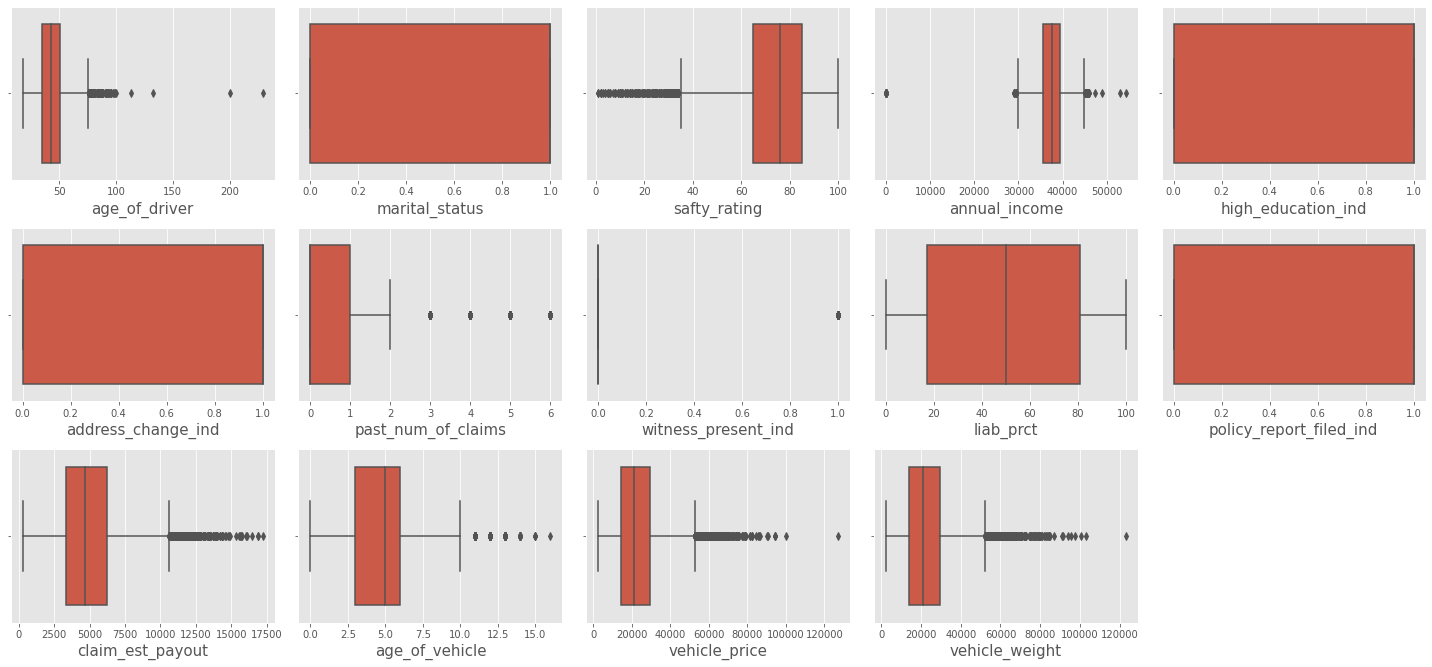

In [15]:
#Boxplot to check for outlier and data range
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in Z.columns:
    if plotnumber <= 30:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(Z[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()
#There's indeed outlier in the dataset

In [16]:
percentile = train['annual_income'].quantile(0.995)
train = train[train['annual_income'] < percentile]
train = train[train['annual_income'] > 25000]
train.shape

(17732, 25)

In [17]:
train = train[train['past_num_of_claims'] < 5]
train.shape

(17574, 25)

In [18]:
percentile = train['claim_est_payout'].quantile(0.995)
train = train[train['claim_est_payout'] < percentile]
train.shape

(17486, 25)

In [19]:
percentile = train['vehicle_price'].quantile(0.995)
train = train[train['vehicle_price'] < percentile]
train.shape

(17398, 25)

In [20]:
percentile = train['vehicle_weight'].quantile(0.995)
train = train[train['vehicle_weight'] < percentile]
train.shape

(17311, 25)

In [21]:
#Dropping the variable which we assumed unneeded in prediction.
#To improve algorithm running time, we decide to drop zip_code and claim_date, but will implement them in our R modelling
to_drop = ['claim_number','zip_code','claim_date','claim_day_of_week','vehicle_color']
train.drop(to_drop, inplace = True, axis = 1)

In [22]:
#We decided to drop age_of_driver as it is highly correlated with annual_income
#age_of_driver has some extremely high outlier e.g. as high as 200
train.drop(columns = ['age_of_driver'], inplace = True, axis = 1)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17311 entries, 0 to 17997
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   17311 non-null  category
 1   marital_status           17311 non-null  int64   
 2   safty_rating             17311 non-null  int64   
 3   annual_income            17311 non-null  float64 
 4   high_education_ind       17311 non-null  int64   
 5   address_change_ind       17311 non-null  int64   
 6   living_status            17311 non-null  category
 7   accident_site            17311 non-null  category
 8   past_num_of_claims       17311 non-null  int64   
 9   witness_present_ind      17311 non-null  int64   
 10  liab_prct                17311 non-null  int64   
 11  channel                  17311 non-null  category
 12  policy_report_filed_ind  17311 non-null  int64   
 13  claim_est_payout         17311 non-null  float64 
 14  age_of

# Data Preprocessing

In [24]:
#Separate predictors and response
X = train.drop('fraud', axis = 1)
y = train['fraud']

In [25]:
#Extracting categorical columns
cat_train = X.select_dtypes(include = ['object','category'])

In [26]:
cat_train.head()

,gender,living_status,accident_site,channel,vehicle_category
0,M,Rent,Local,Broker,Compact
1,F,Rent,Highway,Online,Large
2,F,Own,Local,Broker,Compact
3,F,Own,Local,Broker,Medium
4,M,Rent,Highway,Broker,Medium


In [27]:
for col in cat_train.columns:
    print(f"{col}: \n{cat_train[col].unique()}\n")

gender: 
['M', 'F']
Categories (2, object): ['F', 'M']

living_status: 
['Rent', 'Own']
Categories (2, object): ['Own', 'Rent']

accident_site: 
['Local', 'Highway', 'Parking Lot']
Categories (3, object): ['Highway', 'Local', 'Parking Lot']

channel: 
['Broker', 'Online', 'Phone']
Categories (3, object): ['Broker', 'Online', 'Phone']

vehicle_category: 
['Compact', 'Large', 'Medium']
Categories (3, object): ['Compact', 'Large', 'Medium']



In [28]:
#So that machine can calculate numerical distance between data
cat_train = pd.get_dummies(cat_train, drop_first = True)

In [29]:
cat_train.head()

,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium
0,1,1,1,0,0,0,0,0
1,0,1,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,1
4,1,1,0,0,0,0,0,1


In [30]:
# extracting the numerical columns
num_train = X.select_dtypes(include = [('int64'),('float64')])

In [31]:
num_train.head()

,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
0,1,85,38301.0,1,1,1,0,74,0,7530.940993,9.0,12885.45235,16161.33381
1,0,75,30445.0,0,1,1,1,79,0,2966.024895,4.0,29429.45218,28691.96422
2,0,87,38923.0,0,1,0,0,0,0,6283.888333,3.0,21701.18195,22090.94758
3,1,58,40605.0,1,0,3,0,99,1,6169.747994,4.0,13198.27344,38329.58106
4,1,95,36380.0,1,0,0,1,7,0,4541.387150,7.0,38060.21122,25876.56319


In [32]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_train, cat_train], axis = 1)

In [33]:
X.head()

,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,...,vehicle_price,vehicle_weight,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium
0,1,85,38301.0,1,1,1,0,74,0,7530.940993,...,12885.45235,16161.33381,1,1,1,0,0,0,0,0
1,0,75,30445.0,0,1,1,1,79,0,2966.024895,...,29429.45218,28691.96422,0,1,0,0,1,0,1,0
2,0,87,38923.0,0,1,0,0,0,0,6283.888333,...,21701.18195,22090.94758,0,0,1,0,0,0,0,0
3,1,58,40605.0,1,0,3,0,99,1,6169.747994,...,13198.27344,38329.58106,0,0,1,0,0,0,0,1
4,1,95,36380.0,1,0,0,1,7,0,4541.387150,...,38060.21122,25876.56319,1,1,0,0,0,0,0,1


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17311 entries, 0 to 17997
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   marital_status             17311 non-null  int64  
 1   safty_rating               17311 non-null  int64  
 2   annual_income              17311 non-null  float64
 3   high_education_ind         17311 non-null  int64  
 4   address_change_ind         17311 non-null  int64  
 5   past_num_of_claims         17311 non-null  int64  
 6   witness_present_ind        17311 non-null  int64  
 7   liab_prct                  17311 non-null  int64  
 8   policy_report_filed_ind    17311 non-null  int64  
 9   claim_est_payout           17311 non-null  float64
 10  age_of_vehicle             17311 non-null  float64
 11  vehicle_price              17311 non-null  float64
 12  vehicle_weight             17311 non-null  float64
 13  gender_M                   17311 non-null  uin

In [35]:
#Split data into train to model and test to evaluate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12117, 21)
(12117,)
(5194, 21)
(5194,)


In [36]:
#Scaling data by standardization to deal with high variance

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority',random_state=123)
# fit and apply the transform
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))

Counter({'1': 10321, '0': 10321})


# Model 1 - Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [39]:
# model predictions

y_pred = log_reg.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
#F1 score
print(f1_score(y_train, log_reg.predict(X_train),pos_label='1'))
log_reg_f1 = f1_score(y_test, log_reg.predict(X_test),pos_label='1')
print(log_reg_f1)

0.6464083084912011
0.3692098092643052


In [41]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2800 1510]
 [ 342  542]]


In [42]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      4310
           1       0.26      0.61      0.37       884

    accuracy                           0.64      5194
   macro avg       0.58      0.63      0.56      5194
weighted avg       0.78      0.64      0.69      5194



# Model 2 - K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
# model predictions 

y_pred = knn.predict(X_test)

In [45]:
#F1 score
print(f1_score(y_train, knn.predict(X_train),pos_label='1'))
knn_f1 = f1_score(y_test, knn.predict(X_test),pos_label='1')
print(knn_f1)

0.8907738483622601
0.28700564971751413


In [46]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2920 1390]
 [ 503  381]]


In [47]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      4310
           1       0.22      0.43      0.29       884

    accuracy                           0.64      5194
   macro avg       0.53      0.55      0.52      5194
weighted avg       0.74      0.64      0.68      5194



# Model 3 - Support Vector Machine

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#svc = SVC()
#parameters = {
#    'gamma' : [0.001],
#    'C' : [0.5]
#}

#grid_search = GridSearchCV(svc, parameters)
#grid_search.fit(X_train, y_train)

#parameters = {
#    'gamma' : [0.0001, 0.001, 0.01, 0.1],
#    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
#}
# Remove to run faster after knowing the best parameter

In [49]:
# best parameters

# grid_search.best_params_

In [50]:
# best accuracy 

# grid_search.best_score_

In [51]:
svc = SVC(C = 0.5, gamma = 0.001)
svc.fit(X_train, y_train)

SVC(C=0.5, gamma=0.001)

In [52]:
# model predictions 

y_pred = svc.predict(X_test)

In [53]:
#F1 score
print(f1_score(y_train, svc.predict(X_train),pos_label='1'))
svc_f1 = f1_score(y_test, svc.predict(X_test),pos_label='1')
print(svc_f1)

0.6534297735545785
0.3681427627230668


In [54]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2725 1585]
 [ 327  557]]


In [55]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      4310
           1       0.26      0.63      0.37       884

    accuracy                           0.63      5194
   macro avg       0.58      0.63      0.55      5194
weighted avg       0.79      0.63      0.68      5194



# Model 4 - Stochastic Gradient Descent

In [56]:
from sklearn.linear_model import SGDClassifier

#sgd = SGDClassifier()
#parameters = {
#    'alpha' : [0.01],
#    'loss' : ['hinge'],
#    'penalty' : ['l2']
#}

#grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
#grid_search.fit(X_train, y_train)

#parameters = {
#    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
#    'loss' : ['hinge', 'log'],
#    'penalty' : ['l1', 'l2']
#}
# Remove to run faster after knowing the best parameter

In [57]:
# best parameter 

# grid_search.best_params_

In [58]:
sgd = SGDClassifier(alpha = 0.05, loss = 'hinge', penalty = 'l2')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.05)

In [59]:
# model predictions 

y_pred = sgd.predict(X_test)

In [60]:
#F1 score
print(f1_score(y_train, sgd.predict(X_train),pos_label='1'))
sgd_f1 = f1_score(y_test, sgd.predict(X_test),pos_label='1')
print(sgd_f1)

0.6549342416501089
0.36909871244635195


In [61]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2724 1586]
 [ 325  559]]


In [62]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      4310
           1       0.26      0.63      0.37       884

    accuracy                           0.63      5194
   macro avg       0.58      0.63      0.55      5194
weighted avg       0.79      0.63      0.68      5194



# Model 5 - Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

#dtc = DecisionTreeClassifier()

#parameters = {
#    'criterion' : ['gini'],
#    'max_depth' : range(2, 4, 1),
#    'min_samples_leaf' : range(1, 4, 1),
#    'min_samples_split' : range(2, 6, 1),
#    'splitter' : ['best']
#}

#grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
#grid_search_dt.fit(X_train, y_train)
#parameters = {
#'criterion' : ['gini', 'entropy'],
#    'max_depth' : range(2, 4, 1),
#    'min_samples_leaf' : range(1, 4, 1),
#    'min_samples_split' : range(2, 6, 1),
#    'splitter' : ['best', 'random']
#}
#Removed in running so that algorithm can run faster after knowing the best parameter

In [64]:
# best parameters

#grid_search_dt.best_params_

In [65]:
# best score

#grid_search_dt.best_score_

In [66]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [67]:
y_pred = dtc.predict(X_test)

In [68]:
#F1 score
print(f1_score(y_train, dtc.predict(X_train),pos_label='1'))
dtc_f1 = f1_score(y_test, dtc.predict(X_test),pos_label='1')
print(dtc_f1)

0.6779414904975443
0.3547044129891757


In [69]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2230 2080]
 [ 245  639]]


In [70]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66      4310
           1       0.24      0.72      0.35       884

    accuracy                           0.55      5194
   macro avg       0.57      0.62      0.51      5194
weighted avg       0.79      0.55      0.61      5194



# Model 6 - Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'auto', min_samples_leaf = 3, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=130)

In [72]:
y_pred = rand_clf.predict(X_test)

In [73]:
#F1 score
print(f1_score(y_train, rand_clf.predict(X_train),pos_label='1'))
rand_clf_f1 = f1_score(y_test, rand_clf.predict(X_test),pos_label='1')
print(rand_clf_f1)

0.6908366902810575
0.36779324055666


In [74]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2731 1579]
 [ 329  555]]


In [75]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      4310
           1       0.26      0.63      0.37       884

    accuracy                           0.63      5194
   macro avg       0.58      0.63      0.55      5194
weighted avg       0.78      0.63      0.68      5194



# Model 7 - Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=0.5, gamma=0.001)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=4))])

In [77]:
y_pred = vc.predict(X_test)

In [78]:
#F1 score
print(f1_score(y_train, vc.predict(X_train),pos_label='1'))
vc_f1 = f1_score(y_test, vc.predict(X_test),pos_label='1')
print(vc_f1)

0.6719592276781338
0.37151248164464024


In [79]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2976 1334]
 [ 378  506]]


In [80]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      4310
           1       0.28      0.57      0.37       884

    accuracy                           0.67      5194
   macro avg       0.58      0.63      0.57      5194
weighted avg       0.78      0.67      0.71      5194



# Model 8 - Adapting Boosting

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = log_reg)

ada = AdaBoostClassifier(log_reg, n_estimators = 200)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [82]:
y_pred = ada.predict(X_test)

In [83]:
#F1 score
print(f1_score(y_train, ada.predict(X_train),pos_label='1'))
ada_f1 = f1_score(y_test, ada.predict(X_test),pos_label='1')
print(ada_f1)

0.6434093544646308
0.3678239944998281


In [84]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2820 1490]
 [ 349  535]]


In [85]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      4310
           1       0.26      0.61      0.37       884

    accuracy                           0.65      5194
   macro avg       0.58      0.63      0.56      5194
weighted avg       0.78      0.65      0.69      5194



# Model 9 - Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

#gbc = GradientBoostingClassifier()

#parameters = {
#    'loss': ['exponential'],
#    'learning_rate': [0.1],
#    'n_estimators': [150]
#}

#grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
#grid_search_gbc.fit(X_train, y_train)

#parameters = {
#    'loss': ['deviance', 'exponential'],
#    'learning_rate': [0.001, 0.1, 1, 10],
#    'n_estimators': [100, 150, 180, 200]
#}

In [87]:
# best parameters 

#grid_search_gbc.best_params_

In [88]:
# best score

#grid_search_gbc.best_score_

In [89]:
#    'loss': ['deviance', 'exponential'],
#    'learning_rate': [0.001, 0.1, 1, 10],
#    'n_estimators': [100, 150, 180, 200]

In [90]:
gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150)

In [91]:
y_pred = gbc.predict(X_test)

In [92]:
#F1 score
print(f1_score(y_train, gbc.predict(X_train),pos_label='1'))
gbc_f1 = f1_score(y_test, gbc.predict(X_test),pos_label='1')
print(gbc_f1)

0.7124045175500258
0.3825363825363825


In [93]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2860 1450]
 [ 332  552]]


In [94]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      4310
           1       0.28      0.62      0.38       884

    accuracy                           0.66      5194
   macro avg       0.59      0.64      0.57      5194
weighted avg       0.79      0.66      0.70      5194



# Model 10 - Stochastic Gradient Boosting

In [95]:
sgbc = GradientBoostingClassifier(max_depth=2, subsample=0.5, max_features=0.75, n_estimators=150, random_state=0)

sgbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=0.75, n_estimators=150,
                           random_state=0, subsample=0.5)

In [96]:
y_pred = sgbc.predict(X_test)

In [97]:
#F1 score
print(f1_score(y_train, sgbc.predict(X_train),pos_label='1'))
sgbc_f1 = f1_score(y_test, sgbc.predict(X_test),pos_label='1')
print(sgbc_f1)

0.7019057551910496
0.39156414762741654


In [98]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2906 1404]
 [ 327  557]]


In [99]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      4310
           1       0.28      0.63      0.39       884

    accuracy                           0.67      5194
   macro avg       0.59      0.65      0.58      5194
weighted avg       0.79      0.67      0.71      5194



# Model 11 - Extreme Gradient Boosting

In [100]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.25, max_depth = 3, n_estimators = 150)

xgb.fit(X_train, y_train)

[04:46:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
y_pred = xgb.predict(X_test)

In [102]:
#F1 score
print(f1_score(y_train, xgb.predict(X_train),pos_label='1'))
xgb_f1 = f1_score(y_test, xgb.predict(X_test),pos_label='1')
print(xgb_f1)

0.7924510542168675
0.36632891660171474


In [103]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[3098 1212]
 [ 414  470]]


In [104]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      4310
           1       0.28      0.53      0.37       884

    accuracy                           0.69      5194
   macro avg       0.58      0.63      0.58      5194
weighted avg       0.78      0.69      0.72      5194



# Model 12 - Gaussian Naives Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [106]:
print(f1_score(y_train, gnb.predict(X_train),pos_label='1'))
gnb_f1 = f1_score(y_test, gnb.predict(X_test),pos_label='1')
print(gnb_f1)

0.6335616438356164
0.37196391394864675


In [107]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[2848 1462]
 [ 348  536]]


In [108]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      4310
           1       0.27      0.61      0.37       884

    accuracy                           0.65      5194
   macro avg       0.58      0.63      0.57      5194
weighted avg       0.79      0.65      0.69      5194



# F-measure Score of 12 Classification Algorithm

In [109]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost',
             'GaussianNB'],
    'F1 Score': [log_reg_f1, knn_f1, svc_f1, sgd_f1, dtc_f1, rand_clf_f1, vc_f1, ada_f1, gbc_f1, sgbc_f1, xgb_f1,gnb_f1]
})

models.sort_values(by = 'F1 Score', ascending = False)

,Model,F1 Score
9,Stochastic Gradient Boosting,0.391564
8,Gradient Boosting Classifier,0.382536
11,GaussianNB,0.371964
6,Voting Classifier,0.371512
0,Logistic Regression,0.369210
3,SGD Classifier,0.369099
2,SVC,0.368143
7,Ada Boost Classifier,0.367824
5,Random Forest Classifier,0.367793
10,XgBoost,0.366329


# Predicting Test Set with Stochastic Gradient Boosting

In [110]:
test = pd.read_csv('../input/2021-uofmn-travelers-modeling-competition/test_2021.csv')

In [111]:
test['marital_status'] = test['marital_status'].fillna(test['marital_status'].mode()[0])
test['witness_present_ind'] = test['witness_present_ind'].fillna(test['witness_present_ind'].mode()[0])
test['claim_est_payout'] = test['claim_est_payout'].fillna(test['claim_est_payout'].mode()[0])
test['age_of_vehicle'] = test['age_of_vehicle'].fillna(test['age_of_vehicle'].mode()[0])

In [112]:
test['witness_present_ind']=test['witness_present_ind'].astype(int)
test['marital_status']=test['marital_status'].astype(int)
test['claim_number']=test['claim_number'].astype(str)
test['annual_income']=test['annual_income'].astype(float)
test['zip_code']=test['zip_code'].astype(str)
test['gender'] = test['gender'].astype('category')
test['living_status'] = test['living_status'].astype('category')
test['accident_site'] = test['accident_site'].astype('category')
test['channel'] = test['channel'].astype('category')
test['vehicle_category'] = test['vehicle_category'].astype('category')

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   claim_number             12002 non-null  object  
 1   age_of_driver            12002 non-null  int64   
 2   gender                   12002 non-null  category
 3   marital_status           12002 non-null  int64   
 4   safty_rating             12002 non-null  int64   
 5   annual_income            12002 non-null  float64 
 6   high_education_ind       12002 non-null  int64   
 7   address_change_ind       12002 non-null  int64   
 8   living_status            12002 non-null  category
 9   zip_code                 12002 non-null  object  
 10  claim_date               12002 non-null  object  
 11  claim_day_of_week        12002 non-null  object  
 12  accident_site            12002 non-null  category
 13  past_num_of_claims       12002 non-null  int64   
 14  witnes

In [114]:
test.shape

(12002, 24)

In [115]:
to_drop = ['claim_number','zip_code','claim_date','claim_day_of_week','vehicle_color']

test.drop(to_drop, inplace = True, axis = 1)
#Dropping the variable which we assumed is pointless in prediction so we could run our algorithm faster.

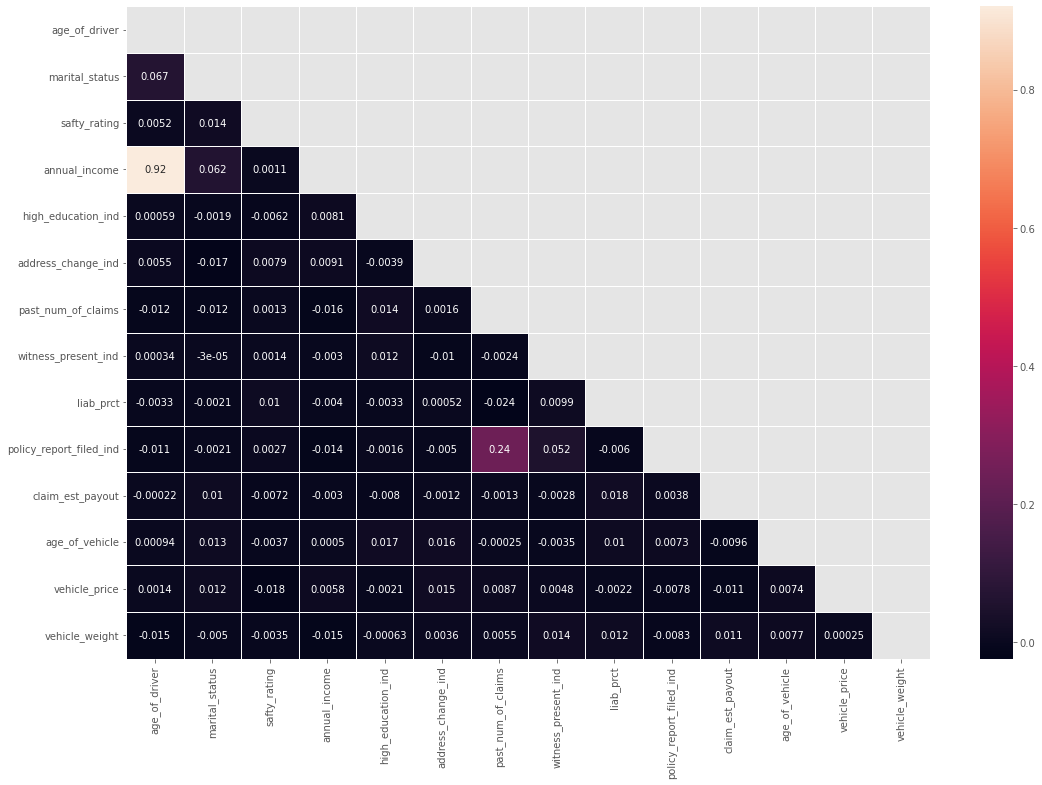

In [116]:
plt.figure(figsize = (18, 12))

corr = test.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()
#Check for multicollinearity

In [117]:
test.drop(columns = ['age_of_driver'], inplace = True, axis = 1)

In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   12002 non-null  category
 1   marital_status           12002 non-null  int64   
 2   safty_rating             12002 non-null  int64   
 3   annual_income            12002 non-null  float64 
 4   high_education_ind       12002 non-null  int64   
 5   address_change_ind       12002 non-null  int64   
 6   living_status            12002 non-null  category
 7   accident_site            12002 non-null  category
 8   past_num_of_claims       12002 non-null  int64   
 9   witness_present_ind      12002 non-null  int64   
 10  liab_prct                12002 non-null  int64   
 11  channel                  12002 non-null  category
 12  policy_report_filed_ind  12002 non-null  int64   
 13  claim_est_payout         12002 non-null  float64 
 14  age_of

In [119]:
cat_test=test.select_dtypes(include = ['object','category'])

In [120]:
cat_test.head()

,gender,living_status,accident_site,channel,vehicle_category
0,M,Own,Highway,Phone,Large
1,M,Own,Highway,Broker,Large
2,F,Own,Parking Lot,Broker,Medium
3,M,Own,Local,Phone,Medium
4,F,Rent,Local,Online,Medium


In [121]:
for col in cat_test.columns:
    print(f"{col}: \n{cat_test[col].unique()}\n")

gender: 
['M', 'F']
Categories (2, object): ['F', 'M']

living_status: 
['Own', 'Rent']
Categories (2, object): ['Own', 'Rent']

accident_site: 
['Highway', 'Parking Lot', 'Local']
Categories (3, object): ['Highway', 'Local', 'Parking Lot']

channel: 
['Phone', 'Broker', 'Online']
Categories (3, object): ['Broker', 'Online', 'Phone']

vehicle_category: 
['Large', 'Medium', 'Compact']
Categories (3, object): ['Compact', 'Large', 'Medium']



In [122]:
cat_test = pd.get_dummies(cat_test, drop_first = True)

In [123]:
cat_test.head()

,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium
0,1,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1
3,1,0,1,0,0,1,0,1
4,0,1,1,0,1,0,0,1


In [124]:
num_test = test.select_dtypes(include = [('int64'),('float64')])

In [125]:
num_test.head()

,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
0,1,73,36633.0,1,0,0,0,25,0,5196.552552,8.0,24360.59273,26633.27819
1,1,63,40252.0,1,1,0,1,50,1,7381.165248,6.0,39710.42665,15875.34874
2,0,75,36634.0,1,1,0,0,98,1,5612.123938,7.0,50327.56618,21365.05932
3,1,72,34960.0,0,1,0,1,45,0,7957.267641,2.0,23457.35282,26707.46021
4,1,70,31776.0,1,1,0,1,11,0,6232.195932,1.0,18238.39202,22949.73744


In [126]:
test = pd.concat([num_test, cat_test], axis = 1)

In [127]:
test.head()

,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,...,vehicle_price,vehicle_weight,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium
0,1,73,36633.0,1,0,0,0,25,0,5196.552552,...,24360.59273,26633.27819,1,0,0,0,0,1,1,0
1,1,63,40252.0,1,1,0,1,50,1,7381.165248,...,39710.42665,15875.34874,1,0,0,0,0,0,1,0
2,0,75,36634.0,1,1,0,0,98,1,5612.123938,...,50327.56618,21365.05932,0,0,0,1,0,0,0,1
3,1,72,34960.0,0,1,0,1,45,0,7957.267641,...,23457.35282,26707.46021,1,0,1,0,0,1,0,1
4,1,70,31776.0,1,1,0,1,11,0,6232.195932,...,18238.39202,22949.73744,0,1,1,0,1,0,0,1


In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   marital_status             12002 non-null  int64  
 1   safty_rating               12002 non-null  int64  
 2   annual_income              12002 non-null  float64
 3   high_education_ind         12002 non-null  int64  
 4   address_change_ind         12002 non-null  int64  
 5   past_num_of_claims         12002 non-null  int64  
 6   witness_present_ind        12002 non-null  int64  
 7   liab_prct                  12002 non-null  int64  
 8   policy_report_filed_ind    12002 non-null  int64  
 9   claim_est_payout           12002 non-null  float64
 10  age_of_vehicle             12002 non-null  float64
 11  vehicle_price              12002 non-null  float64
 12  vehicle_weight             12002 non-null  float64
 13  gender_M                   12002 non-null  uin

In [129]:
sc = StandardScaler()
test = sc.fit_transform(test)

In [130]:
test_pred = sgbc.predict(test)

In [131]:
test_pred = pd.DataFrame(test_pred, columns= ['fraud'])

In [132]:
df= test_pred[['fraud']]

In [133]:
df.head()

,fraud
0,0
1,0
2,0
3,0
4,0


In [134]:
df.to_csv('Prediction - SGB.csv' , index=False)